**Template Matching:** Simply looking for an exact copy of an image in another image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

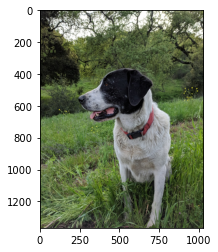

In [10]:
full = cv2.imread(r'C:\Users\Data\computer vision\sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

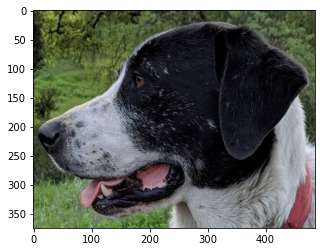

In [23]:
face = cv2.imread(r'C:\Users\Data\computer vision\sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [24]:
print('full shape :', full.shape)
print('Face shape :', face.shape)

full shape : (1367, 1025, 3)
Face shape : (375, 486, 3)


Salah satu kelemahan dari **Template Matching** adalah : kita harus memiliki gambar yang tepat dari apa yang kita cari yang sebenarnya mengalahkan tujuan deteksi objek.

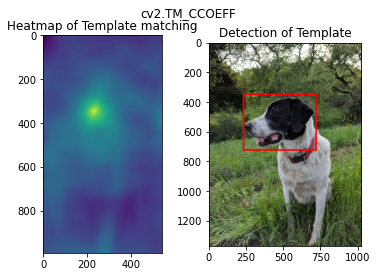

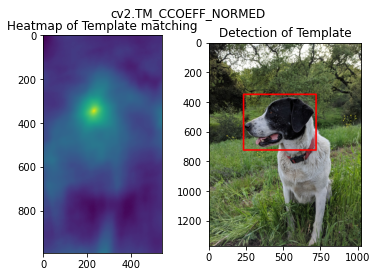

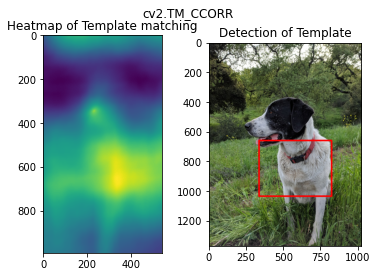

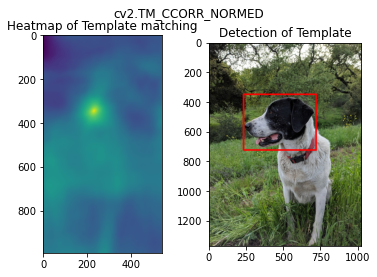

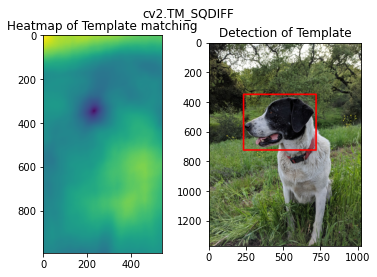

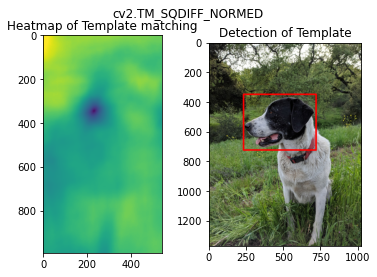

In [37]:

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']


for m in methods:
    full_copy = full.copy()
    methods = eval(m)
    
    # template machine
    res = cv2.matchTemplate(full_copy, face, methods)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if methods in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
        
    height ,width, channels = face.shape
    bottom_right = (top_left[0]+ width , top_left[1]+ height)
    
    cv2.rectangle(full_copy ,top_left, bottom_right, (255,0,0), 10)
    
    # plot
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of Template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    
    plt.suptitle(m)
    plt.show()
    

In [39]:
res.shape

(993, 540)